In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
train = pd.read_csv('C:\\Users\\guilh_000\\Documents\\nlpdisaster\\train.csv')
test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\nlpdisaster\\test.csv')

print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [4]:
train.head(10)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [5]:
test.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
isreal = train[train.target == 1]
print(isreal.shape)

(3271, 5)


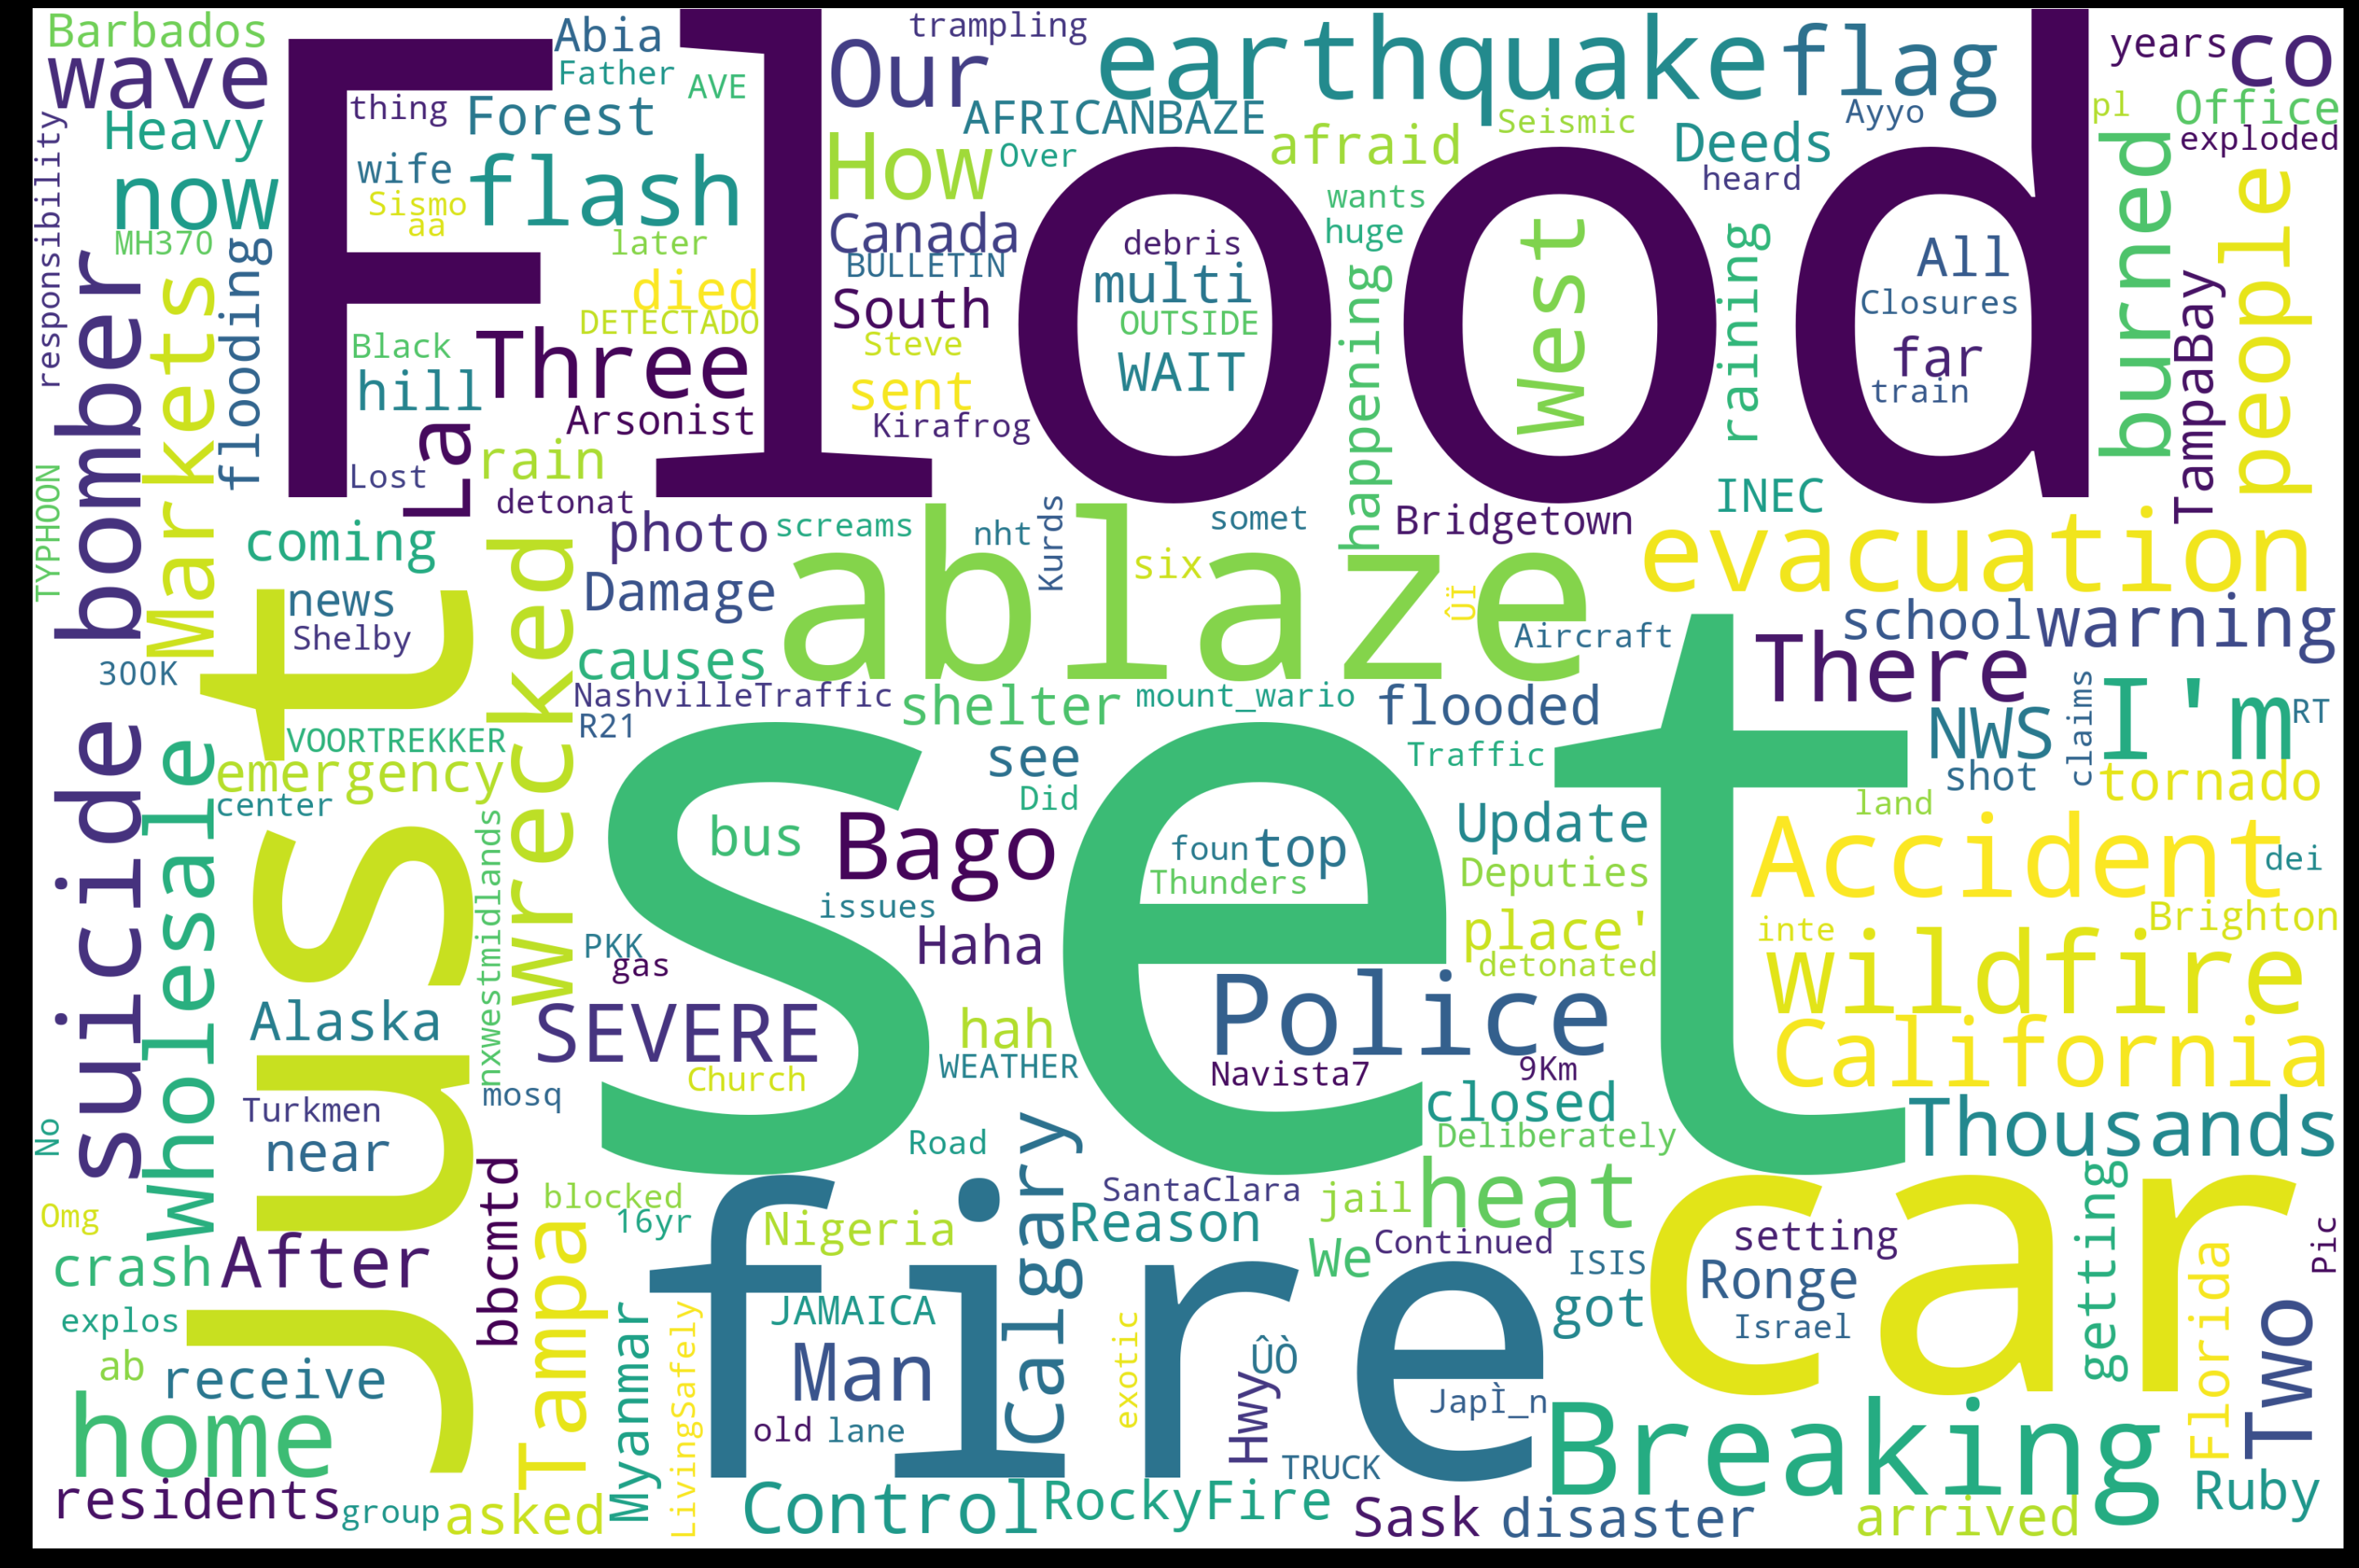

In [15]:
#build real distaster tweets wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isreal.text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
isfake = train[train.target == 0]
print(isfake.shape)

(4342, 5)


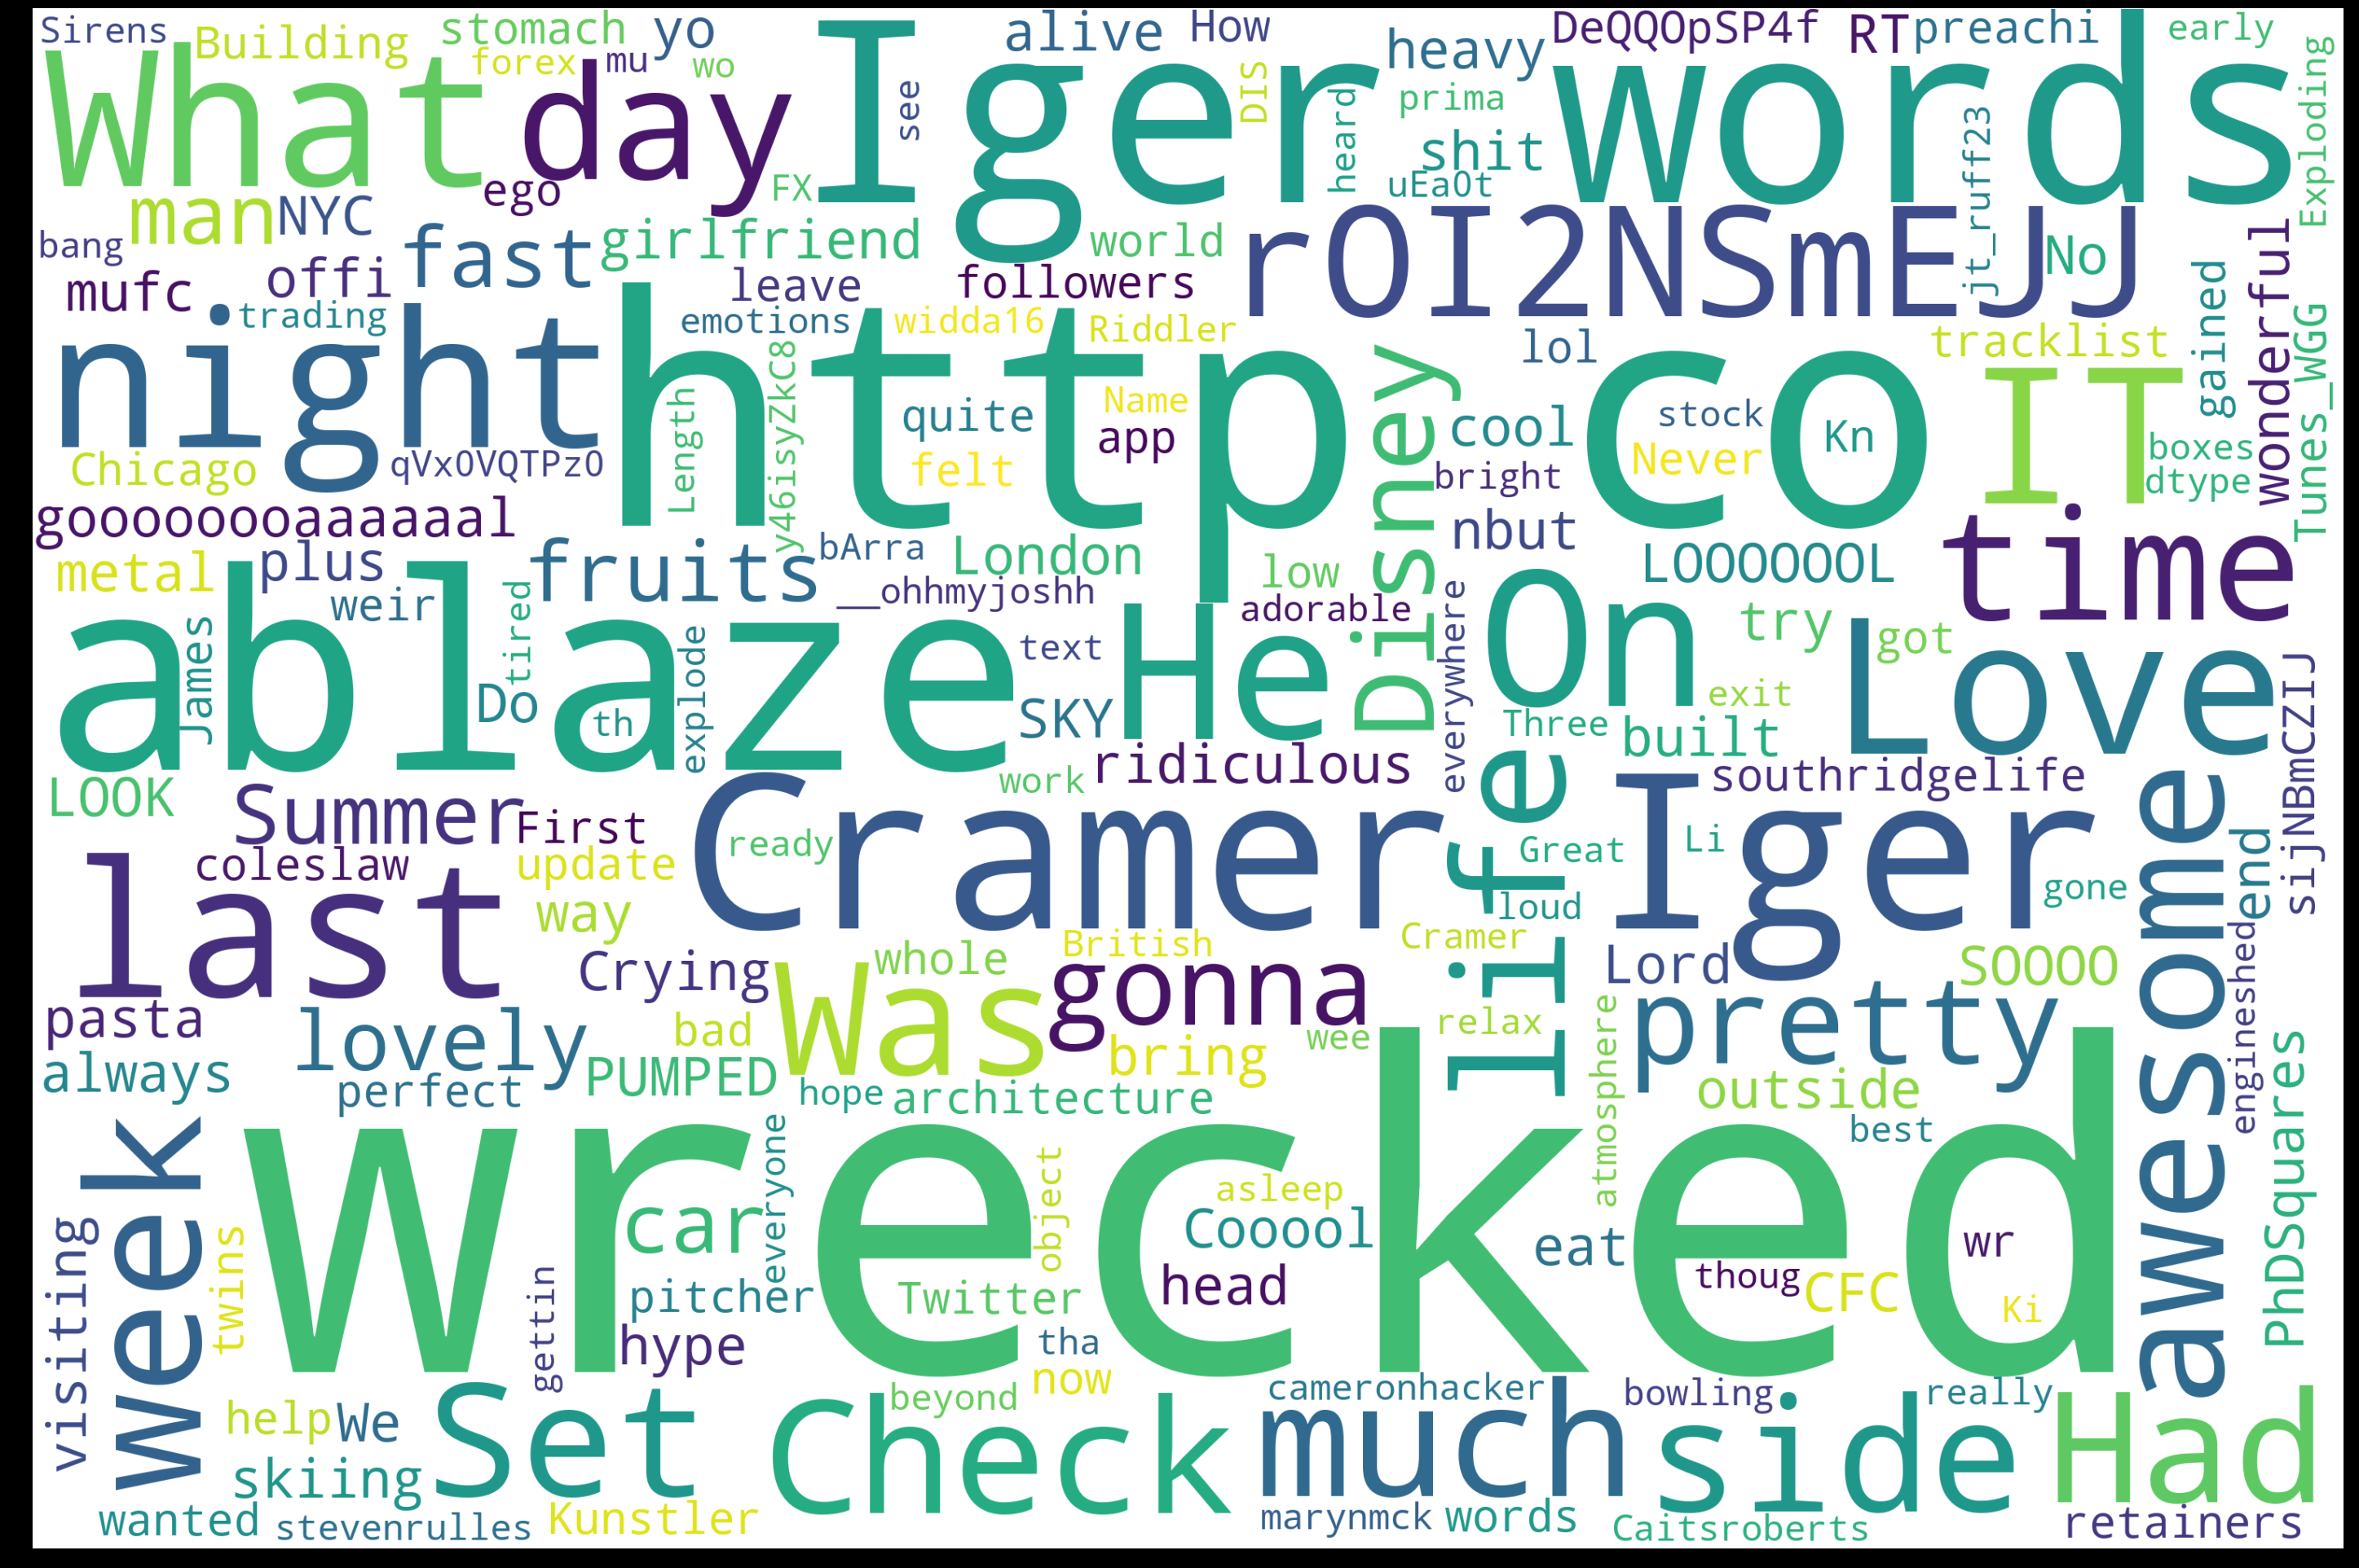

In [17]:
#build fake distaster tweets wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isfake.text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("#",  " ", tweet)           # Replace pattern # -> ' '
    #tweet = re.sub("dont|not|isnt|doesnt|arent|aint", "negation", tweet) #contains negation
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [10]:
train['normalized'] = train.text.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [11]:
train.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         normalized  \
0       1       [reason, earthquake, may, allah, forgive, u]   
1       1                    [near, la, ronge, sask, canada]   
2       1  [ask, shelter, place, notify, officer, evacuat...   
3       1          [wildfire, evacuation, order, california]   
4       1  [send, photo, ruby, alaska, smoke, wildfire, p...   

                                              normal  
0              reason earthquake may allah forgive u  
1                          near la ronge sask canada  
2  ask shelter place notify officer evacuation sh...  
3               wildfire evacuation order california  
4  send photo ruby alaska smoke wildfire pour school

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id            7613 non-null int64
keyword       7552 non-null object
location      5080 non-null object
text          7613 non-null object
target        7613 non-null int64
normalized    7613 non-null object
normal        7613 non-null object
dtypes: int64(2), object(5)
memory usage: 416.4+ KB


In [13]:
train = train.drop(['id', 'keyword', 'location'], axis=1)
train.head()

text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

                                          normalized  \
0       [reason, earthquake, may, allah, forgive, u]   
1                    [near, la, ronge, sask, canada]   
2  [ask, shelter, place, notify, officer, evacuat...   
3          [wildfire, evacuation, order, california]   
4  [send, photo, ruby, alaska, smoke, wildfire, p...   

                                              normal  
0              reason earthquake may allah forgive u  
1                          near la ronge sask canada  
2  ask shelter place notify officer evacuation sh...  
3               wildfire evacuation order california  
4  send photo ruby alaska smoke wildfire pour school

In [60]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
#indexed_data =hstack((np.array(range(0,final_features.shape[0]))[:,None],final_features))

vectorized_data.shape
#tfid_data.shape
#final_features.shape

#tfid resulted the better results for the competition testing dataset 

(7613, 47552)

In [61]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.25,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [34]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=True, alpha=2.5).fit(data_train, targets_train)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))

[[951 158]
 [216 579]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1109
           1       0.79      0.73      0.76       795

    accuracy                           0.80      1904
   macro avg       0.80      0.79      0.80      1904
weighted avg       0.80      0.80      0.80      1904

0.8035714285714286


In [33]:
#CHECK BEST PARAMETERS FOR CLASSIFIER

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 2.5, 'fit_prior': True}
0.7726396917148363


In [49]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=0.1,random_state=0)
clf.fit(data_train, targets_train)

LinearSVC(C=0.1, random_state=0)

In [50]:
y_pred = clf.predict(data_test)

print(confusion_matrix(targets_test, y_pred))
print(classification_report(targets_test, y_pred))
print(accuracy_score(targets_test, y_pred))

[[1002  107]
 [ 270  525]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1109
           1       0.83      0.66      0.74       795

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.79      1904
weighted avg       0.81      0.80      0.80      1904

0.8019957983193278


In [48]:
hiperparameters = {'C': (0.001,0.1,1.0,10.0,100.0)}
grid = GridSearchCV(LinearSVC(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

{'C': 0.1}
0.7750919600630582


In [62]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=0)
lrc.fit(data_train, targets_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = lrc.predict(data_test)

print(confusion_matrix(targets_test, y_pred))
print(classification_report(targets_test, y_pred))
print(accuracy_score(targets_test, y_pred))

[[1041   68]
 [ 364  431]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1109
           1       0.86      0.54      0.67       795

    accuracy                           0.77      1904
   macro avg       0.80      0.74      0.75      1904
weighted avg       0.79      0.77      0.76      1904

0.773109243697479


In [36]:
########
newtest = test
newtest.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [37]:
newtest = newtest.drop(['id', 'keyword', 'location'], axis=1)

In [38]:
newtest['normalized'] = newtest.text.apply(normalizer)
newtest['normal'] = [' '.join(map(str, l)) for l in newtest['normalized']]

In [39]:
newtest.head()

text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan   

                                          normalized  \
0                             [terrible, car, crash]   
1  [earthquake, different, city, stay, safe, ever...   
2  [forest, fire, spot, pond, goose, flee, across...   
3                                [spokane, wildfire]   
4                              [kill, china, taiwan]   

                                              normal  
0                                 terrible car crash  
1       earthquake different city stay safe everyone  
2  forest fire spot pond goose flee across street...  
3                                   spokane wildfire  
4                                  kill china taiwan

In [64]:
tweet_to_predict = newtest['normal']
x = count_vectorizer.transform(tweet_to_predict)
#xdata = tfidfconverter.transform(x)
j = 0 
for i in ((nbc.predict(x))):
    if i == 1:   
        print(j)
    j += 1

0
1
2
3
4
5
15
17
19
23
25
29
32
34
36
39
43
52
60
62
63
64
65
67
68
69
72
73
74
75
76
79
82
83
84
85
88
89
149
151
158
166
167
168
169
171
172
173
178
180
183
184
188
189
192
199
200
207
214
217
218
219
220
221
225
226
227
249
256
257
258
260
261
262
263
264
265
266
267
268
269
272
276
279
280
282
283
285
286
288
293
298
312
318
372
386
417
424
464
470
471
474
475
478
479
480
483
484
489
490
492
495
498
499
500
501
502
503
504
505
506
507
508
509
510
511
513
514
515
517
518
519
521
522
523
524
525
528
529
532
535
539
540
541
542
543
544
545
546
547
548
550
551
552
553
554
555
556
557
562
575
577
578
580
586
587
591
594
598
600
605
606
607
608
609
611
612
614
615
617
619
620
622
623
627
628
631
635
639
641
654
664
665
668
669
675
676
679
683
684
687
688
689
692
693
700
708
709
713
714
715
716
718
722
723
724
726
731
733
736
755
765
766
767
768
769
771
772
775
776
777
779
786
787
790
791
798
800
801
802
804
806
807
841
853
855
859
860
863
864
867
868
873
878
903
908
910
920
921
925
931


In [41]:
RS = nbc.predict(x)

In [51]:
RSVC = clf.predict(x)

In [68]:
RLR = lrc.predict(xdata)

In [69]:
test['target'] = RLR
test.head()

id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1

In [43]:
test = test.drop(['keyword', 'location', 'text'], axis=1)
test.head()

id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1

In [70]:
test.to_csv("C:\\Users\\guilh_000\\Documents\\nlpdisaster\\targetslrtdif.csv", index = False, header=True)

In [52]:
def submit(preprocdata, subfile, model):
    sub_df = pd.read_csv(subfile)
    sub_df['target'] = model.predict(preprocdata)
    sub_df.to_csv("C:\\Users\\guilh_000\\Documents\\nlpdisaster\\newtarget.csv", index = False, header=True)

text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan   

                                          normalized  \
0                             [terrible, car, crash]   
1  [earthquake, different, city, stay, safe, ever...   
2  [forest, fire, spot, pond, goose, flee, across...   
3                                [spokane, wildfire]   
4                              [kill, china, taiwan]   

                                              normal  target  
0                                 terrible car crash       1  
1       earthquake different city stay safe everyone       1  
2  forest fire spot pond goose flee across street...       1  
3                                   spokane wildfire       1  
4                                  kill china taiwan       1

In [ ]:
submit(xdata, test, lrd)